In [1]:
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt
import xarray as xr

from config import obspack_dir

%matplotlib inline

In [2]:
def dataset_summary(fname):
    print(fname)
    path = '/'.join([obspack_dir, 'data', 'nc', fname])
    ds = xr.open_dataset(path)
    time = ds.time_decimal
    print(f'site_code={ds.attrs["site_code"]}, site_name={ds.attrs["site_name"]}')
    print(f'(lat,lon) = ({ds.latitude.mean().values},{ds.longitude.mean().values})')
    print(f'samples = {len(time)}')
    print(f'year_span = {time.min().values}-{time.max().values}' )
    print(f'samples per year = {len(time) / (time.max()-time.min()).values}' )
    print('****************************************')

    yr_lo, yr_hi = 1981, 2005
    mask = (ds.qcflag == b'...') & (ds.time_decimal >= yr_lo) & (ds.time_decimal <= yr_hi)

    # detrend, using only non-masked values
    yr_centered = (ds.time_decimal - 0.5*(yr_hi+yr_lo))
    pf = P.polyfit(yr_centered, ds.value, 2, w=(ds.qcflag == b'...'))
    print(1.0e6*pf)

    # set non-masked values to NaN
    ds.value.values = ds.value.where(mask)
    yr_centered.values = yr_centered.where(mask)

    fig, ax = plt.subplots()
    ax.plot(ds.time_decimal, 1.0e6*ds.value)
    ax.plot(ds.time_decimal, 1.0e6*P.polyval(yr_centered, pf))
    ax.set_ylabel('ppm')
    plt.show()

    ds.value.values -= P.polyval(yr_centered, pf)

    fig, ax = plt.subplots()
    ax.plot(ds.time_decimal, 1.0e6*ds.value)
    ax.set_ylabel('ppm')
    plt.show()

    fig, ax = plt.subplots()
    value_mon_clim = ds.value.groupby(ds.time_components[:,1]).mean()
    value_mon_clim -= value_mon_clim.mean()
    ax.plot(value_mon_clim.time_components, 1.0e6*value_mon_clim)
    ax.set_ylabel('ppm')
    plt.show()


co2_brw_surface-flask_1_representative.nc
site_code=BRW, site_name=Barrow Atmospheric Baseline Observatory
(lat,lon) = (71.31970977783203,-156.60043334960938)
samples = 2696
year_span = 1971.3369596651446-2018.9722460045662
samples per year = 56.59669978238107
****************************************
[3.58906424e+02 1.65724830e+00 1.21560006e-02]


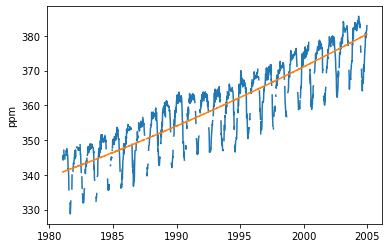

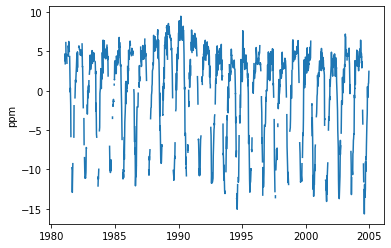

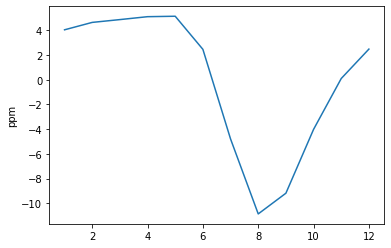

co2_azr_surface-flask_1_representative.nc
site_code=AZR, site_name=Terceira Island, Azores
(lat,lon) = (38.757572174072266,-27.21378517150879)
samples = 1110
year_span = 1979.9986301369863-2018.9416704718417
samples per year = 28.50316745830735
****************************************
[3.57202648e+02 1.59625443e+00 1.69309120e-02]


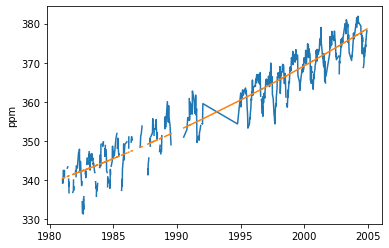

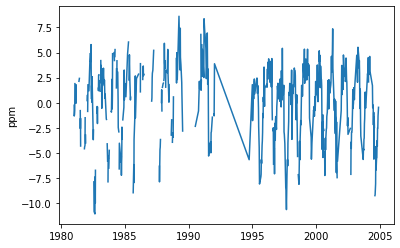

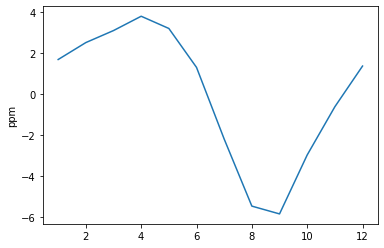

co2_mlo_surface-flask_1_representative.nc
site_code=MLO, site_name=Mauna Loa, Hawaii
(lat,lon) = (19.531530380249023,-155.57736206054688)
samples = 2820
year_span = 1969.6349219939118-2018.9886339421614
samples per year = 57.1385593642266
****************************************
[3.57098609e+02 1.66446443e+00 1.26494462e-02]


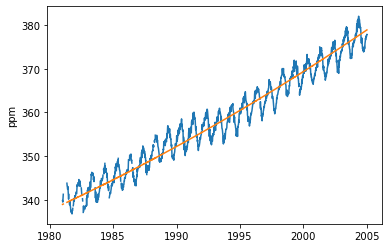

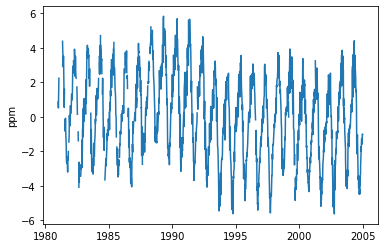

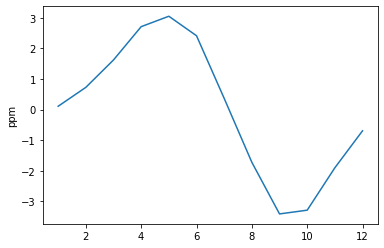

co2_sey_surface-flask_1_representative.nc
site_code=SEY, site_name=Mahe Island
(lat,lon) = (-4.682400226593018,55.53249740600586)
samples = 1689
year_span = 1980.0442850637523-2018.9896974885844
samples per year = 43.36839424309379
****************************************
[3.55740455e+02 1.54360453e+00 1.79780534e-02]


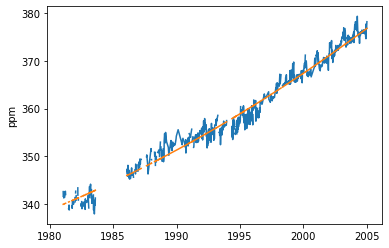

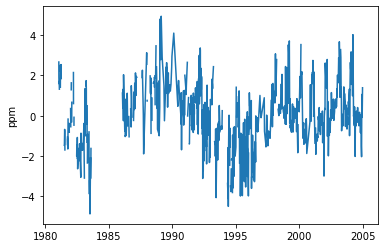

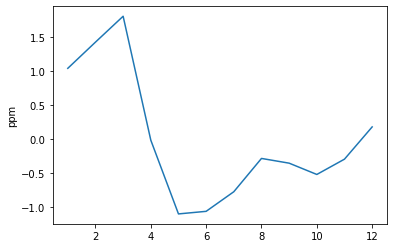

co2_asc_surface-flask_1_representative.nc
site_code=ASC, site_name=Ascension Island
(lat,lon) = (-7.966699123382568,-14.39999771118164)
samples = 3259
year_span = 1979.653196347032-2018.9957838660578
samples per year = 82.83644278414515
****************************************
[3.55886677e+02 1.53362016e+00 1.66921568e-02]


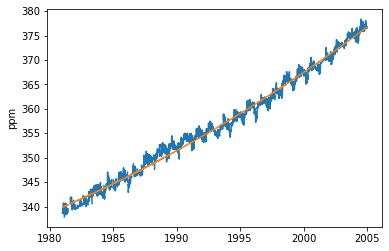

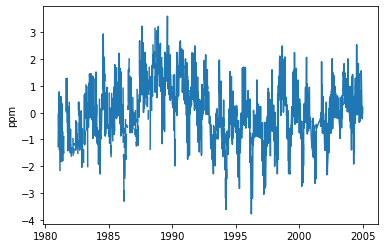

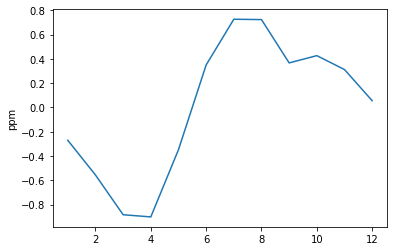

co2_smo_surface-flask_1_representative.nc
site_code=SMO, site_name=Tutuila
(lat,lon) = (-14.247238159179688,-170.5678253173828)
samples = 3343
year_span = 1973.6539383561644-2018.9917161339422
samples per year = 73.73541809626508
****************************************
[3.55774187e+02 1.60050399e+00 1.40356776e-02]


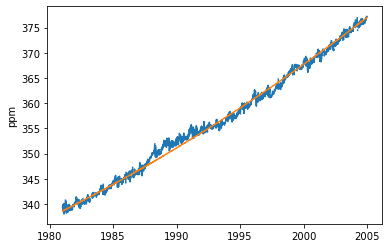

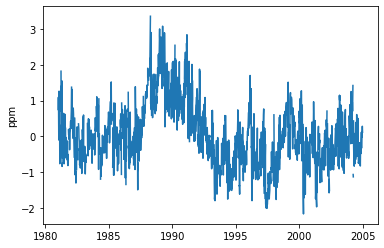

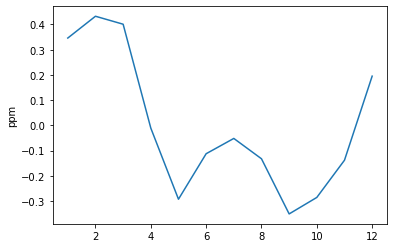

co2_psa_surface-flask_1_representative.nc
site_code=PSA, site_name=Palmer Station, Antarctica
(lat,lon) = (-64.9189682006836,-64.0)
samples = 1679
year_span = 1978.0813070776255-2018.993184931507
samples per year = 41.03942639828522
****************************************
[3.54832156e+02 1.55790971e+00 1.46736848e-02]


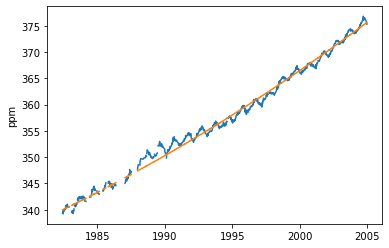

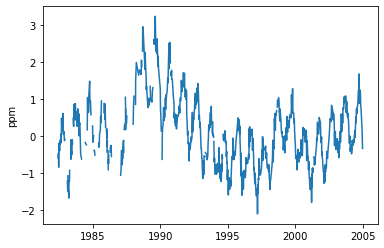

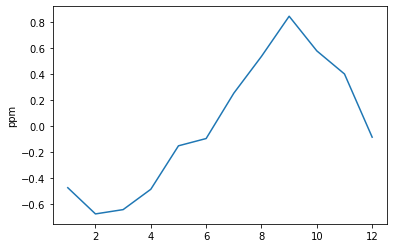

co2_spo_surface-flask_1_representative.nc
site_code=SPO, site_name=South Pole, Antarctica
(lat,lon) = (-89.97789764404297,-24.799997329711914)
samples = 2059
year_span = 1975.107191780822-2018.9780955098934
samples per year = 46.93315671624942
****************************************
[3.54664785e+02 1.59445003e+00 1.32733002e-02]


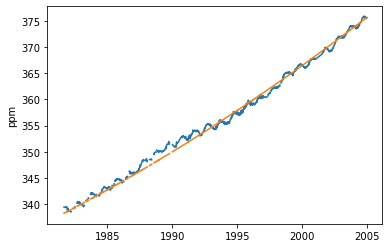

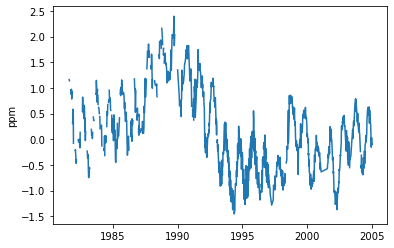

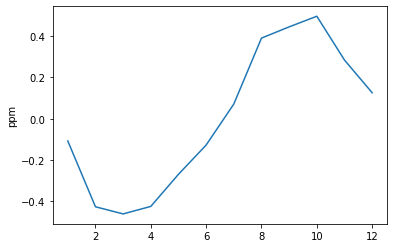

In [3]:
fnames = [
    'co2_brw_surface-flask_1_representative.nc',
    'co2_azr_surface-flask_1_representative.nc',
    'co2_mlo_surface-flask_1_representative.nc',
    'co2_sey_surface-flask_1_representative.nc',
    'co2_asc_surface-flask_1_representative.nc',
    'co2_smo_surface-flask_1_representative.nc',
    'co2_psa_surface-flask_1_representative.nc',
    'co2_spo_surface-flask_1_representative.nc'
]

for fname in fnames:
    dataset_summary(fname)